File not found: /kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv


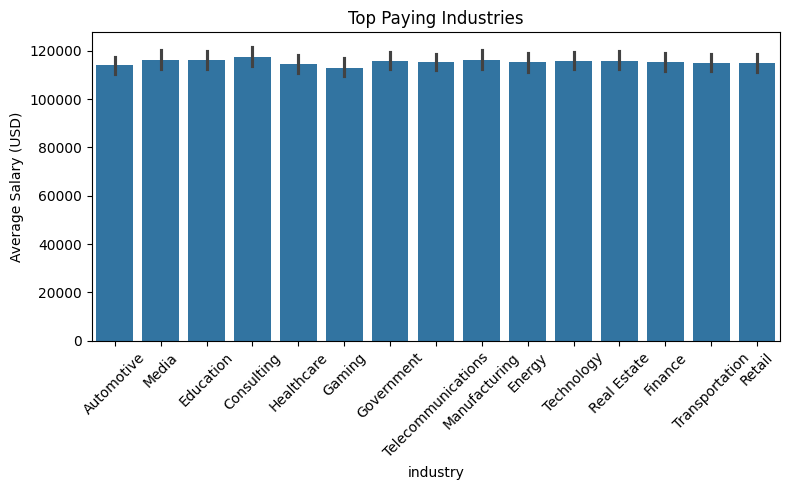

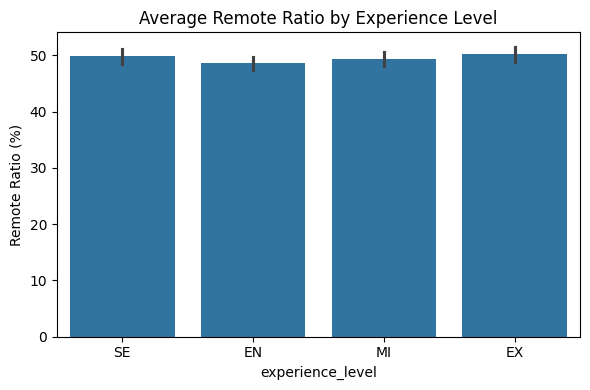

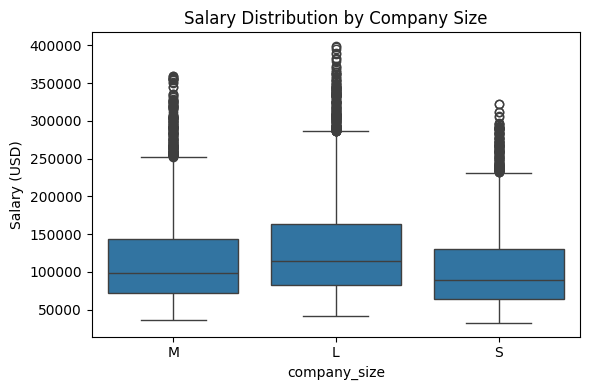

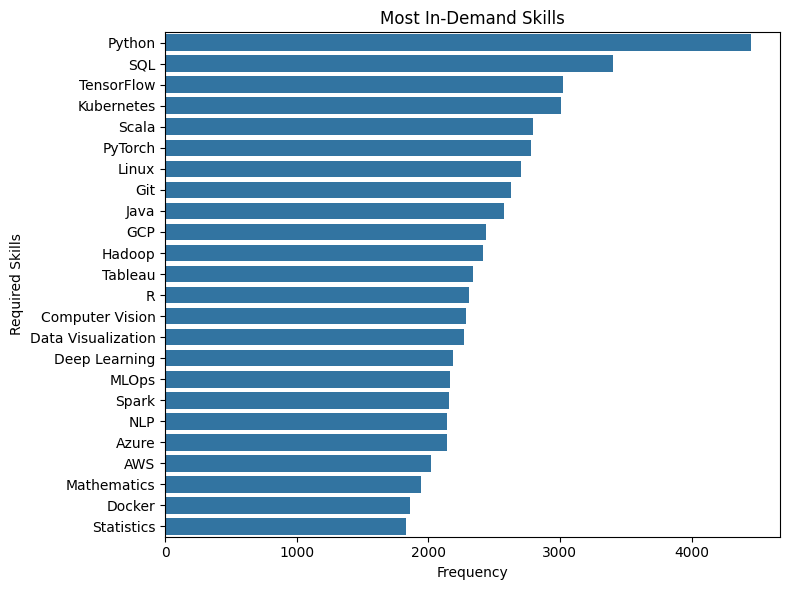

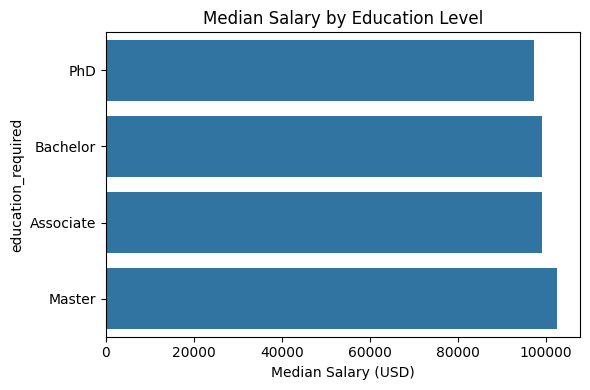

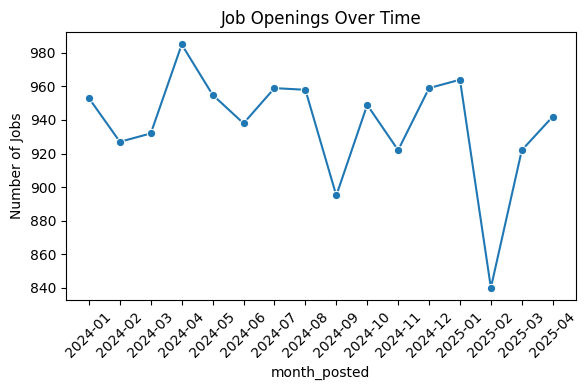

<ipython-input-14-1da8f609ce3e>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='growth_score', y='company_name', data=company_stats, palette='viridis')


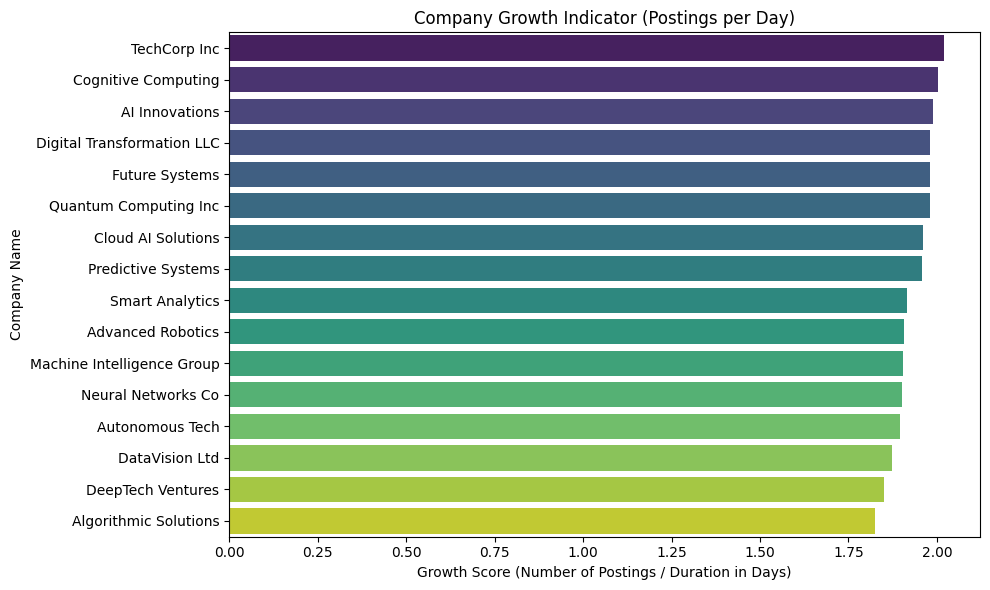

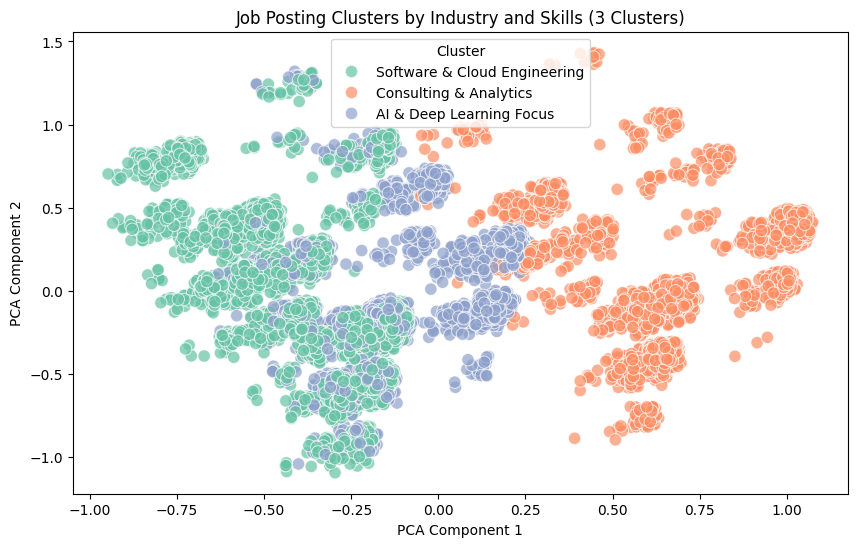

<ipython-input-14-1da8f609ce3e>:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_skills.index, x=top_skills.values, ax=axes[cluster_num], palette='coolwarm')
<ipython-input-14-1da8f609ce3e>:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_skills.index, x=top_skills.values, ax=axes[cluster_num], palette='coolwarm')
<ipython-input-14-1da8f609ce3e>:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_skills.index, x=top_skills.values, ax=axes[cluster_num], palette='coolwarm')


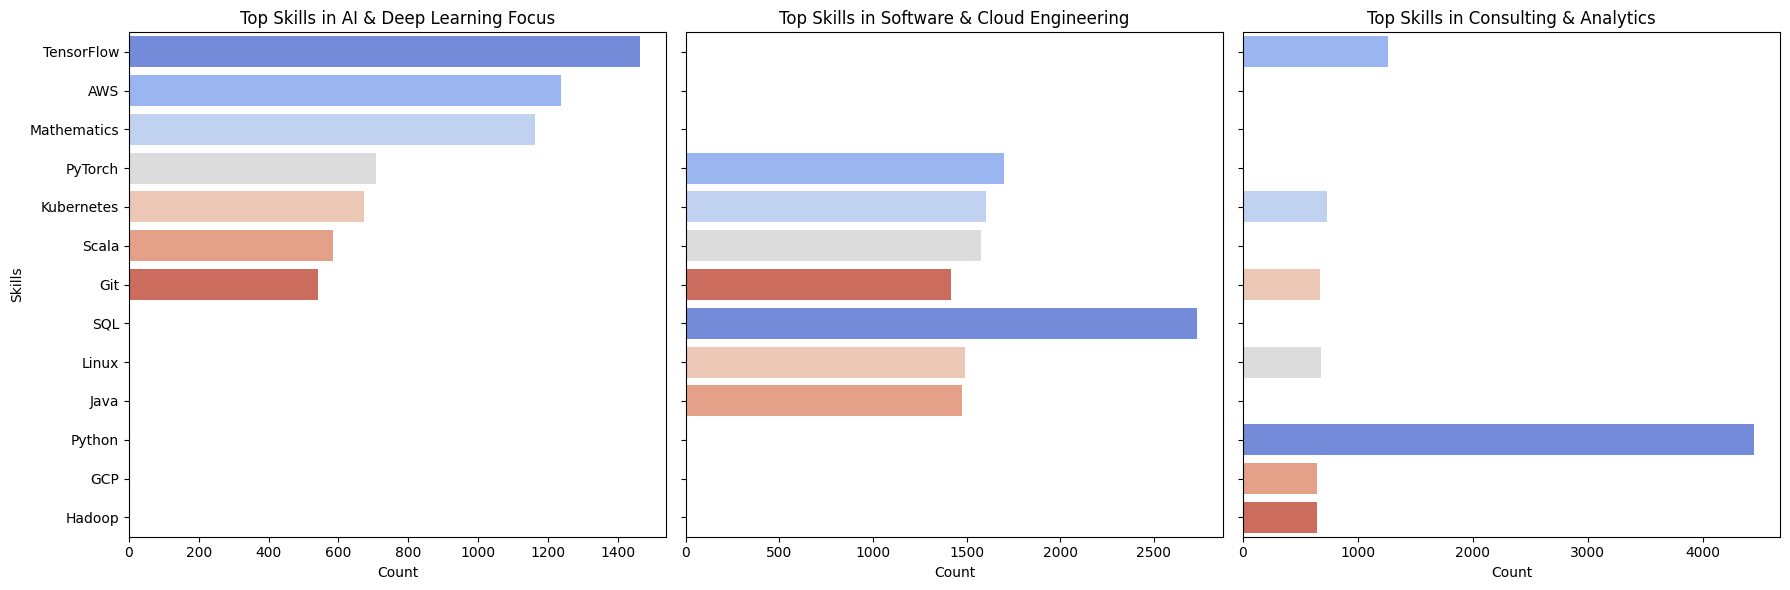


Cluster 0 (AI & Deep Learning Focus):
Top Industries: ['Government', 'Media', 'Finance']
Top Skills: ['TensorFlow', 'AWS', 'Mathematics', 'PyTorch', 'Kubernetes']

Cluster 1 (Software & Cloud Engineering):
Top Industries: ['Retail', 'Consulting', 'Technology']
Top Skills: ['SQL', 'PyTorch', 'Kubernetes', 'Scala', 'Linux']

Cluster 2 (Consulting & Analytics):
Top Industries: ['Real Estate', 'Technology', 'Retail']
Top Skills: ['Python', 'TensorFlow', 'Kubernetes', 'Linux', 'Git']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA

import os
# Corrected data loading to happen once after finding the file path
csv_file_path = '/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv'
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print("Dataset loaded successfully.")
    display(df.head())
    display(df.shape)
else:
    print(f"File not found: {csv_file_path}")

df["posting_date"] = pd.to_datetime(df["posting_date"])
df["application_deadline"] = pd.to_datetime(df["application_deadline"])

# 1. Top Paying Industries
fig1, ax1 = plt.subplots(figsize=(8, 5))
sns.barplot(data=df, x="industry", y="salary_usd", estimator="mean", ax=ax1)
ax1.set_title("Top Paying Industries")
ax1.set_ylabel("Average Salary (USD)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# 2. Remote Work Trend by Experience Level
fig2, ax2 = plt.subplots(figsize=(6, 4))
sns.barplot(data=df, x="experience_level", y="remote_ratio", estimator="mean", ax=ax2)
ax2.set_title("Average Remote Ratio by Experience Level")
ax2.set_ylabel("Remote Ratio (%)")

plt.tight_layout()
plt.show()
# 3. Company Size vs Salary
fig3, ax3 = plt.subplots(figsize=(6, 4))
sns.boxplot(data=df, x="company_size", y="salary_usd", ax=ax3)
ax3.set_title("Salary Distribution by Company Size")
ax3.set_ylabel("Salary (USD)")

plt.tight_layout()
plt.show()
# 4. Most In-Demand Skills
skills_series = df["required_skills"].str.split(", ").explode()
top_skills = skills_series.value_counts()
fig4, ax4 = plt.subplots(figsize=(8, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, ax=ax4)
ax4.set_title("Most In-Demand Skills")
ax4.set_xlabel("Frequency")
ax4.set_ylabel("Required Skills")

plt.tight_layout()
plt.show()
# 5. Education Level vs Salary
fig5, ax5 = plt.subplots(figsize=(6, 4))
edu_salary = df.groupby("education_required")["salary_usd"].median().sort_values()
sns.barplot(x=edu_salary.values, y=edu_salary.index, ax=ax5)
ax5.set_title("Median Salary by Education Level")
ax5.set_xlabel("Median Salary (USD)")

plt.tight_layout()
plt.show()
# 6. Job Openings Over Time
df['month_posted'] = df['posting_date'].dt.to_period('M').astype(str)
fig6, ax6 = plt.subplots(figsize=(6, 4))
monthly_counts = df['month_posted'].value_counts().sort_index()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', ax=ax6)
ax6.set_title("Job Openings Over Time")
ax6.set_ylabel("Number of Jobs")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# Group by company and calculate posting stats
company_stats = df.groupby('company_name').agg(
    first_posting=('posting_date', 'min'),
    last_posting=('posting_date', 'max'),
    num_postings=('posting_date', 'count')
).reset_index()

company_stats['posting_duration_days'] = (company_stats['last_posting'] - company_stats['first_posting']).dt.days

# Add a "growth score" = num_postings / posting_duration_days (more posts, less time = higher score)
company_stats['growth_score'] = company_stats['num_postings'] / company_stats['posting_duration_days']

# Sort by growth_score descending
company_stats = company_stats.sort_values('growth_score', ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='growth_score', y='company_name', data=company_stats, palette='viridis')

plt.title('Company Growth Indicator (Postings per Day)')
plt.xlabel('Growth Score (Number of Postings / Duration in Days)')
plt.ylabel('Company Name')

plt.tight_layout()
plt.show()
# 1. Process skills into list
df['skills_list'] = df['required_skills'].str.split(',').apply(lambda x: [s.strip() for s in x])

# 2. One-hot encode industry
industry_ohe = pd.get_dummies(df['industry'], prefix='industry')

# 3. MultiLabelBinarizer for skills
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(df['skills_list']), columns=mlb.classes_, index=df.index)

# 4. Combine industry and skills features
X = pd.concat([industry_ohe, skills_encoded], axis=1)

# 5. Cluster with KMeans into 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 6. Analyze clusters to assign meaningful names
cluster_summaries = {}
for cluster_num in range(3):
    cluster_data = df[df['cluster'] == cluster_num]

    top_industries = cluster_data['industry'].value_counts().head(3).index.tolist()
    cluster_summaries[cluster_num] = {
        'top_industries': top_industries,
        'top_skills': cluster_data['skills_list'].explode().value_counts().head(5).index.tolist()
    }

# Example naming based on top industries and skills (customize these)
cluster_names = {
    0: "AI & Deep Learning Focus",
    1: "Software & Cloud Engineering",
    2: "Consulting & Analytics"
}
# Add descriptive cluster label column
df['cluster_label'] = df['cluster'].map(cluster_names)

# 7. PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Plot clusters with descriptive names
plt.figure(figsize=(10,6))
palette = sns.color_palette('Set2', 3)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_label'], palette=palette, s=80, alpha=0.7)
plt.title('Job Posting Clusters by Industry and Skills (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
# Plot top skills per cluster with labels
fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

for cluster_num in range(3):
    cluster_skills = df[df['cluster'] == cluster_num]['skills_list'].explode()
    top_skills = cluster_skills.value_counts().head(7)

    sns.barplot(y=top_skills.index, x=top_skills.values, ax=axes[cluster_num], palette='coolwarm')
    axes[cluster_num].set_title(f'Top Skills in {cluster_names[cluster_num]}')
    axes[cluster_num].set_xlabel('Count')
    if cluster_num == 0:
        axes[cluster_num].set_ylabel('Skills')
    else:
        axes[cluster_num].set_ylabel('')

plt.tight_layout()
plt.show()
# Print cluster summary for your reference
for cluster_num, summary in cluster_summaries.items():
    print(f"\nCluster {cluster_num} ({cluster_names[cluster_num]}):")
    print(f"Top Industries: {summary['top_industries']}")
    print(f"Top Skills: {summary['top_skills']}")

